# Introduction to Pandas

# Pandas key features

- Fast and efficient DataFrame object with default and customized indexing.

- Tools for loading data into in-memory data objects from different file formats.

- Data alignment and integrated handling of missing data.

- Reshaping and pivoting of date sets.

- Label-based slicing, indexing and subsetting of large data sets.

- Columns from a data structure can be deleted or inserted.

- Group by data for aggregation and transformations.

- High performance merging and joining of data.

- Time Series functionality.

### INSTALL:

python -m pip install pandas



## Pandas & dataframes

In using Pandas we will use examples bases on WOS data

Pandas allows to load data into objects named DATAFRAMES or SERIES

#### Series: 
a pandas Series is a one dimensional data structure (“a one dimensional ndarray”) that can store values — and for every value it holds a unique index, too.

#### DataFrame: 
a pandas DataFrame is a two (or more) dimensional data structure – basically a table with rows and columns. The columns have names and the rows have indexes.

#### Panel:
type object that is a container of dataframes.

First example creates a random df where index is a progressive number

The second example uses a list of dates as index;


In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(6, 4),  columns=list('ABCD'))
# np.random.randn Return a sample (or samples) from the “standard normal” distribution

df


,A,B,C,D
0,1.025810,-2.215433,1.449237,-1.232604
1,0.206106,-0.389100,1.388444,-1.664070
2,0.694047,0.726217,0.376137,-1.174106
3,-0.516296,-0.755441,-0.280128,-0.804298
4,-0.883183,0.216340,-0.141989,-1.484603
5,-0.684273,2.405245,-1.898070,-0.084515


In [6]:
dates = pd.date_range('20190101', periods=6)
# pd.date_range returns a container for datetimes

df = pd.DataFrame(np.random.randn(6, 4), index=dates)

df


,0,1,2,3
2019-01-01,1.613378,-0.241415,-0.274588,1.063399
2019-01-02,-0.189472,-0.531496,0.684315,1.801561
2019-01-03,-0.616021,0.189205,-0.710221,-0.727594
2019-01-04,0.603193,-0.291562,1.080581,-0.906177
2019-01-05,-0.051643,0.803315,-0.038415,0.613031
2019-01-06,1.380820,0.894210,-0.715459,-1.167867


A DF can be also created by passing a dictionary of objects

In [8]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo', 
                    'G': np.random.randn(4)})

df2

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,3,test,foo,0.251648
1,1.0,2013-01-02,1.0,3,train,foo,-0.701442
2,1.0,2013-01-02,1.0,3,test,foo,-1.150568
3,1.0,2013-01-02,1.0,3,train,foo,-0.733272


## Importing DFs from files

Pandas can read a Csv file with just one function: read_csv().

quick functions to visualize df:

head() function to print the first five rows.
data.head()

data.tail(3) last 3 rows
data.index shows values and dtype of index
data.columns shows a series object with all column names

an advanced tool is QGRID
qgrid is a widget that allows advanced view of dataframes

#### Qgrid install:

conda config --add channels conda-forge
conda install qgrid

then from jupyter go to nbextensions and enable it

EDIT 15/5/2015 - Qgrid is not working with newer version of jupiter



In [10]:
import qgrid

data = pd.read_csv("wos_publications.csv")
# data.head()
qgrid_widget = qgrid.show_grid(data,show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [ ]:

# qgrid_widget.get_changed_df()


### Data access

Next step is make some basic statistics to understand how dataframes get data

 dataframe.field_name
 
 dataframe['field_name']
 
 dataframe[['field1', ... 'fieldn']]  (argument here is a list [l1,l2..ln]

adding a range [start:end] selects a subset (leading and traling record are excluded)


In [15]:
data.abstract[:10]

0    \r\n<p>Inter-firm relationships are coordinate...
1    \r\n<p>We consider an overlapping generations ...
2    \r\n<p>Through an in-depth analysis of a custo...
3    \r\n<p>This paper presents a model in which ag...
4    \r\n<p>This paper introduces a definition of p...
5    \r\n<p>Whether in high-tech, service, or tradi...
6                                                  NaN
7                                                  NaN
8    \r\n<p>This paper evaluates VAR models designe...
9    \r\n<p>Observed fiscal policy reflects the inc...
Name: abstract, dtype: object

In [12]:
data[['UID', 'pubyear']][3:7]
# note dataframe formatting different from above
# if in previous you had put data[['abstract']][:10] you'd have had 
# same df rendering


,UID,pubyear
3,WOS:000073475100004,1998
4,WOS:000073918900007,1998
5,WOS:000073954500017,1998
6,WOS:000074282700018,1998


#### isna() dropna()

Another useful feature .isna() allows to display fields which have null values

if we also add .sum() we can have a quick statistic showing which fields have null value 
and how many records for each field;

in case we'd need only data where all fields contain value we could apply 

dataset = dataset.dropna()

In [18]:
data.isna().sum()

UID                   0
accession_no          0
issn                  2
eissn              1730
doi                 583
doc_type              0
source                0
itemtitle             0
pubyear               0
pubmonth            349
coverdate             0
sortdate              0
vol                  38
pubtype               0
issue               418
supplement         2990
special_issue      2876
part_no            3074
indicator          3100
is_archive         3100
has_abstract          0
oases_type_gold    3100
abstract            355
dtype: int64

## data selection: 

loc, iloc, boolean indexing and isin

are function that allow to access data

#### loc: Access a group of rows and columns by label(s)
#### iloc: Purely integer-location based indexing for selection by position.

#### Boolean indexing:
df[df.column + condition] --> returns only records where condition is true

#### isin
df[df.column.isin(['val1,'val2'...'valn'])] returns records where column values are in the list 


In [19]:
data.loc[1:5, ['pubyear', 'doc_type']] # records 1 to 5 year and type of publication

,pubyear,doc_type
1,1998,Article
2,1998,Article
3,1998,Article
4,1998,Article
5,1998,Article


In [20]:
data.iloc[1:6, [8, 5]] # same as above

,pubyear,doc_type
1,1998,Article
2,1998,Article
3,1998,Article
4,1998,Article
5,1998,Article


In [38]:
data[data.pubyear<1999][-3:]  # last 3 articles with year < 1999 reverse order

,UID,accession_no,issn,eissn,doi,doc_type,source,itemtitle,pubyear,pubmonth,...,pubtype,issue,supplement,special_issue,part_no,indicator,is_archive,has_abstract,oases_type_gold,abstract
31,WOS:000079809500009,187VV,0040-585X,1095-7219,NaN,Article,THEORY OF PROBABILITY AND ITS APPLICATIONS,On the central limit problem for partially exc...,1998,NaN,...,Journal,4,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>This paper deals with a central limit p...
38,WOS:000080643300005,202GG,0927-5940,NaN,NaN,Article,INTERNATIONAL TAX AND PUBLIC FINANCE,Taxation and integrated financial markets: The...,1998,OCT,...,Journal,4,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>The past decade has witnessed the explo...
3099,WOS:A1984AEB9600005,AEB96,0017-0097,NaN,NaN,Article,GIORNALE DEGLI ECONOMISTI E ANNALI DI ECONOMIA,PRICE-DISCRIMINATION AND ECONOMIC-INTEGRATION ...,1984,NaN,...,Journal,9-10,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN


In [39]:
# if we want to search some text...

data[data.source.str.contains('STUDIES')].head()


,UID,accession_no,issn,eissn,doi,doc_type,source,itemtitle,pubyear,pubmonth,...,pubtype,issue,supplement,special_issue,part_no,indicator,is_archive,has_abstract,oases_type_gold,abstract
0,WOS:000071806400001,YV270,0170-8406,1741-3044,NaN,Article,ORGANIZATION STUDIES,An organizational assessment of interfirm coor...,1997,NaN,...,Journal,6,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>Inter-firm relationships are coordinate...
15,WOS:000076423700001,128TY,0170-8406,NaN,NaN,Editorial Material,ORGANIZATION STUDIES,Back to the future of organization theory,1998,NaN,...,Journal,4,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
16,WOS:000076423700005,128TY,0170-8406,NaN,NaN,Article,ORGANIZATION STUDIES,Do all roads lead to Rome ... or Berlin? The e...,1998,NaN,...,Journal,4,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>Contingent and institutional perspectiv...
68,WOS:000088373300009,337QN,0170-8406,NaN,NaN,Book Review,ORGANIZATION STUDIES,An empirically-based microeconomics,2000,NaN,...,Journal,2,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
217,WOS:000184251400001,702YA,0010-4140,NaN,10.1177/0010414003254183,Article,COMPARATIVE POLITICAL STUDIES,European integration and national social citiz...,2003,AUG,...,Journal,6,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>The deepening of European integration h...


In [40]:
data[data['pubyear'].isin([1999])][:3]  # 3 records of 1999

,UID,accession_no,issn,eissn,doi,doc_type,source,itemtitle,pubyear,pubmonth,...,pubtype,issue,supplement,special_issue,part_no,indicator,is_archive,has_abstract,oases_type_gold,abstract
19,WOS:000077559000004,148XF,0014-2921,NaN,NaN,Article,EUROPEAN ECONOMIC REVIEW,Enforcement of employment security regulations...,1999,JAN,...,Journal,1,NaN,NaN,NaN,NaN,NaN,Y,NaN,"\r\n<p>Contrary to the popular wisdom, 'sclero..."
21,WOS:000077699300005,151AT,0192-5121,NaN,NaN,Article,INTERNATIONAL POLITICAL SCIENCE REVIEW,The American system of separated government: A...,1999,JAN,...,Journal,1,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>How should one define the American syst...
22,WOS:000077754900011,152BE,0735-0015,NaN,NaN,Article,JOURNAL OF BUSINESS & ECONOMIC STATISTICS,Some consequences of temporal aggregation in e...,1999,JAN,...,Journal,1,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>I derive the generating mechanism of a ...


Or selecting articles titles in journals of management, dropping duplicates with function

drop_duplicates()

In [43]:
journals = ['MANAGEMENT SCIENCE', 'STRATEGIC MANAGEMENT JOURNAL']
mgt = data[data['source'].isin(journals)]
mgt['itemtitle'].drop_duplicates()

390     Organizational governance and employee pay: Ho...
797                 WHAT PASSES AS A RIGOROUS CASE STUDY?
944     A Breath of Fresh Air? Firm Type, Scale, Scope...
983     The "I Designed It Myself" Effect in Mass Cust...
1049    THE EFFECT OF CEO PAY DEVIATIONS ON CEO WITHDR...
1359    CORPORATE CAPITAL ALLOCATION: A BEHAVIORAL PER...
1385    Growing pains: Pre-entry experience and the ch...
1386    Measuring the effect of M&A on patenting quant...
1432    Structural knowledge: how executive experience...
1433    A network perspective on organizational archit...
1669              Is family leadership always beneficial?
1685    Multistage Capital Budgeting with Delayed Cons...
1713        Managing Licensing in a Market for Technology
1734    Necessity as the mother of "green' inventions:...
1784    Platform competition: Strategic trade-offs in ...
1805    THE ELEPHANT IN THE ROOM OF DYNAMIC CAPABILITI...
1806    PRODUCT PROLIFERATION STRATEGIES AND FIRM PERF...
1818         I

### Some basic statistic functions:

As in many other languages you can use max() min() mean() median() count() sum()
like: dataframe.column.function()  (ie : data.pubyear.min() )

describe() shows a quick statistic summary of your data

groupby(column) creates an object with stats for group;
count() function allows to show the total of non null ('NaN') fields

Other useful methods are 

rank() Data Ranking produces ranking for each element in the array of elements.

corr() Correlation shows the linear relationship between any two array of value.

cov() The Series object has a method cov to compute covariance between series objects.

pct_change() This function compares every element with its prior element and computes the change percentage.

rolling(window = n).funct() : applies to a rolling window a given function 

In [44]:
data.describe()

,pubyear,indicator,is_archive,oases_type_gold
count,3100.000000,0.0,0.0,0.0
mean,2011.296129,NaN,NaN,NaN
std,4.660814,NaN,NaN,NaN
min,1984.000000,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN
75%,2015.000000,NaN,NaN,NaN
max,2018.000000,NaN,NaN,NaN


In [45]:
data.groupby('pubyear').count()

,UID,accession_no,issn,eissn,doi,doc_type,source,itemtitle,pubmonth,coverdate,...,pubtype,issue,supplement,special_issue,part_no,indicator,is_archive,has_abstract,oases_type_gold,abstract
pubyear,,,,,,,,,,,,,,,,,,,,,
1984,1,1,1,0,0,1,1,1,0,1,...,1,1,0,0,0,0,0,1,0,0
1997,1,1,1,1,0,1,1,1,0,1,...,1,1,0,0,0,0,0,1,0,1
1998,22,22,21,1,0,22,22,22,17,22,...,22,21,0,0,0,0,0,22,0,17
1999,31,31,31,2,0,31,31,31,27,31,...,31,29,1,0,0,0,0,31,0,24
2000,31,31,31,2,1,31,31,31,28,31,...,31,30,0,0,1,0,0,31,0,23
2001,44,44,44,3,1,44,44,44,32,44,...,44,41,0,3,2,0,0,44,0,39
2002,57,57,57,6,7,57,57,57,52,57,...,57,55,1,2,0,0,0,57,0,44
2003,61,61,61,4,25,61,61,61,59,61,...,61,59,0,1,2,0,0,61,0,57
2004,73,73,73,8,39,73,73,73,65,73,...,73,72,1,0,0,0,0,73,0,64


Next step is to select count only for one fields
to make things easier we create a new DF with group by data
and we show content for UID field

In [46]:
grouped = data.groupby('pubyear')
print (grouped['UID'].count())

pubyear
1984      1
1997      1
1998     22
1999     31
2000     31
2001     44
2002     57
2003     61
2004     73
2005     77
2006     93
2007    121
2008    167
2009    186
2010    213
2011    200
2012    231
2013    262
2014    253
2015    315
2016    340
2017    314
2018      7
Name: UID, dtype: int64


In [47]:
data['pubyear'].value_counts()
# this is by default sorted by count desc

2016    340
2015    315
2017    314
2013    262
2014    253
2012    231
2010    213
2011    200
2009    186
2008    167
2007    121
2006     93
2005     77
2004     73
2003     61
2002     57
2001     44
2000     31
1999     31
1998     22
2018      7
1997      1
1984      1
Name: pubyear, dtype: int64

## Drawing

By using matplotlib now we draw the trend of number of articles by year


Populating the interactive namespace from numpy and matplotlib


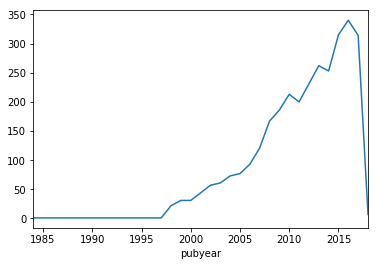

In [48]:
import matplotlib.pyplot as plt
%pylab inline
grouped['UID'].count().plot()
plt.show()

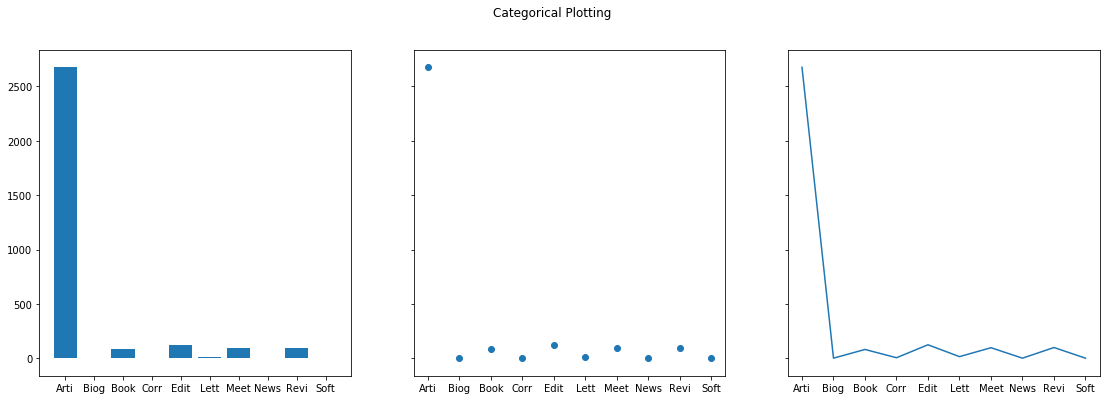

In [88]:
# three plotting by type of publication

grouped2 = pd.DataFrame(data.groupby('doc_type')['UID'].count()).reset_index()
# reset_index : function if we want the index column as numeric autoincremental;
# otherwise in this case doc_type would become index

names = list(grouped2.doc_type.str[:4])
values = list(grouped2.UID)

fig, axs = plt.subplots(1, 3, figsize=(19, 6), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

plt.show()

## Sort and transpose

DF can be sorted by index or by values

.T allows also transposing

df.sort_index(axis=1, ascending=False, inplace=True)   [default makes a copy]
sorts objects by labels along the given axis
axis : index (0), or  columns names (1) to direct sorting


df.sort_values(by='column name', ascending=False)
sorts all dataset by columns values

Note: when sorting by values the inndex could be no more ordered, you can apply method .reset_index()



In [67]:
a=pd.DataFrame(grouped['UID'].count())
a.T

pubyear,1984,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
UID,1,1,22,31,31,44,57,61,73,77,...,186,213,200,231,262,253,315,340,314,7


In [90]:
a.sort_values(by='UID', ascending=False)

,UID
pubyear,
2016,340
2015,315
2017,314
2013,262
2014,253
2012,231
2010,213
2011,200
2009,186


### Updating Dataframes

Now we want to do some update to the existing dataset

we start by adding a new column PTYPE that contains only one letter instead of the full description of kind of publication
that is contained in column pubtype

then we want to set values as follows:

Journal  = A
Book in series = B

We might do a 'case by case' update using a where condition like
data.loc[df['pubtype'] == 'Journal', 'ptype'] = 'A'




In [91]:
data['ptype']=data['pubtype']

# this case works but should be avoided: use dict instead
# data.loc[df['pubtype'] == 'Journal', 'ptype'] = 'A'
# data.loc[df['pubtype'] == 'Book in series', 'ptype'] = 'B'

d1 = { 'Journal': "A",
       'Book in series': 'B'}

data.replace({'ptype': d1}, inplace=True)  #inplace makes it store; try without

data.head(5)



,UID,accession_no,issn,eissn,doi,doc_type,source,itemtitle,pubyear,pubmonth,...,issue,supplement,special_issue,part_no,indicator,is_archive,has_abstract,oases_type_gold,abstract,ptype
0,WOS:000071806400001,YV270,0170-8406,1741-3044,NaN,Article,ORGANIZATION STUDIES,An organizational assessment of interfirm coor...,1997,NaN,...,6,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>Inter-firm relationships are coordinate...,A
1,WOS:000072608300005,ZC705,0013-0133,NaN,NaN,Article,ECONOMIC JOURNAL,Pension reform and economic performance under ...,1998,MAR,...,447,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>We consider an overlapping generations ...,A
2,WOS:000073333300005,ZK531,0033-6807,NaN,NaN,Article,R & D MANAGEMENT,Exploiting and creating knowledge through cust...,1998,APR,...,2,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>Through an in-depth analysis of a custo...,A
3,WOS:000073475100004,ZL821,0938-2259,NaN,NaN,Article,ECONOMIC THEORY,The optimality of nominal contracts,1998,MAY,...,3,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>This paper presents a model in which ag...,A
4,WOS:000073918900007,ZQ946,0040-585X,NaN,NaN,Article,THEORY OF PROBABILITY AND ITS APPLICATIONS,"Well calibrated, coherent forecasting systems",1998,NaN,...,1,NaN,NaN,NaN,NaN,NaN,Y,NaN,\r\n<p>This paper introduces a definition of p...,A



Similar results could be obtained with 

np.where() 


function, for instance to set atype = A if journal, else Other 


data['atype'] = np.where(newdata['ptype']=='A', 'Article', 'Other')

Now we use groupby to check how many A and B type publications are in our data
Eventually we also use the function unique() on doc_type to see what subkind of 
publications;
in the last line we extract a count of the copy ptype, doc_type to check also 
doc_type correspondance to publication macro type


In [92]:
data.groupby('ptype')['UID'].count()

ptype
A    3089
B      11
Name: UID, dtype: int64

In [93]:
data['doc_type'].unique()

array(['Article', 'Book Review', 'Editorial Material', 'Software Review',
       'Meeting Abstract', 'Letter', 'Review', 'Correction',
       'Biographical-Item', 'News Item'], dtype=object)

In [94]:
data.groupby(['ptype','doc_type'])['UID'].count()

ptype  doc_type          
A      Article               2666
       Biographical-Item        1
       Book Review             81
       Correction               5
       Editorial Material     123
       Letter                  15
       Meeting Abstract        97
       News Item                1
       Review                  99
       Software Review          1
B      Article                 10
       Editorial Material       1
Name: UID, dtype: int64

Most of the examples above just show the result of operation without storing it
neither in the existing DF nor in a new one.

We might eventually think of creating a dataset with the count by ptype:

## Iterating dataframes

iteritems() − to iterate over the (key,value) pairs
is a sort of horizontal scan by field name

iterrows() − iterate over the rows as (index,series) pairs
sans each row by index 

itertuples() − iterate over the rows as namedtuples
returns an object where we have all values and names plus index value


Because iterrows returns a Series for each row, it does not preserve dtypes across the rows (dtypes are preserved across columns for DataFrames).
To preserve dtypes while iterating over the rows, it is better to use itertuples() which returns namedtuples of the values and which is generally faster than iterrows.

In [96]:
df1= data.iloc[0:2, 0:5]
for key,value in df1.iteritems():
   print (key)
   print (value)
   print ('\n')

UID
0    WOS:000071806400001
1    WOS:000072608300005
Name: UID, dtype: object


accession_no
0    YV270
1    ZC705
Name: accession_no, dtype: object


issn
0    0170-8406
1    0013-0133
Name: issn, dtype: object


eissn
0    1741-3044
1          NaN
Name: eissn, dtype: object


doi
0    NaN
1    NaN
Name: doi, dtype: object




In [97]:
for row_index,row in df1.iterrows():
   print (row_index)
   print (row)
   print ('\n')

0
UID             WOS:000071806400001
accession_no                  YV270
issn                      0170-8406
eissn                     1741-3044
doi                             NaN
Name: 0, dtype: object


1
UID             WOS:000072608300005
accession_no                  ZC705
issn                      0013-0133
eissn                           NaN
doi                             NaN
Name: 1, dtype: object




In [98]:
for row in df1.itertuples():
    print (row.UID)
    print (row)
    

WOS:000071806400001
Pandas(Index=0, UID='WOS:000071806400001', accession_no='YV270', issn='0170-8406', eissn='1741-3044', doi=nan)
WOS:000072608300005
Pandas(Index=1, UID='WOS:000072608300005', accession_no='ZC705', issn='0013-0133', eissn=nan, doi=nan)


## Functions apply()

apply takes a function and applies it to all values of pandas series.


dataframe.apply(func, convert_dtype=True, args=())

func: .apply takes a function and applies it to all values of pandas series.

convert_dtype: Convert dtype as per the function’s operation.

args=(): Additional arguments to pass to function instead of series.

Return Type: Pandas Series after applied function/operation.



In [ ]:
def remove_p(text):
    
    try: 
        return text.replace('<p>', '')
    except AttributeError:
        return np.NaN


data['abstract']=data['abstract'].apply(remove_p)
data.head(5)

In [ ]:
data.head(5)